In [1]:
# Importing libraries
import pandas as pd
import os
import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
# reading file into memory
cln_crime_dt = pd.read_csv('C:\\Python_Files\\Crime_data\\CLEAN_CRM_DATA.csv')

In [3]:
# Print the first 10 columns
print("\n\n Sample Data:")
print("==========================================================================\n")
print(cln_crime_dt.head(10))



 Sample Data:

   DIV_REC_NO            TIMESTAMP   Date_Rptd  AREA_Cd    AREA_NAME  \
0   190326475  2020-03-01 21:30:00  2020-03-01        7     Wilshire   
1   200106753  2020-02-08 18:00:00  2020-02-09        1      Central   
2   200320258  2020-11-04 17:00:00  2020-11-11        3    Southwest   
3   200907217  2020-03-10 20:37:00  2023-05-10        9     Van Nuys   
4   200200759  2020-07-07 13:40:00  2020-07-07        2      Rampart   
5   200406391  2020-03-01 14:30:00  2020-03-02        4   Hollenbeck   
6   200606074  2020-02-07 16:15:00  2020-02-12        6    Hollywood   
7   201110303  2020-06-08 20:00:00  2020-06-11       11    Northeast   
8   201000767  2020-07-13 20:00:00  2020-07-14       10  West Valley   
9   200906009  2020-02-13 22:30:00  2020-02-14        9     Van Nuys   

   Rpt_Dist_No  Part_1-2  Crm_Cd                               Crm_Cd_Desc  \
0          784         1     510                          VEHICLE - STOLEN   
1          182         1     330  

In [4]:
cln_crime_dt.columns

Index(['DIV_REC_NO', 'TIMESTAMP', 'Date_Rptd', 'AREA_Cd', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age',
       'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc', 'Status_Cd',
       'Status_Desc', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [5]:
cln_crime_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618733 entries, 0 to 618732
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DIV_REC_NO    618733 non-null  int64  
 1   TIMESTAMP     618733 non-null  object 
 2   Date_Rptd     618733 non-null  object 
 3   AREA_Cd       618733 non-null  int64  
 4   AREA_NAME     618733 non-null  object 
 5   Rpt_Dist_No   618733 non-null  int64  
 6   Part_1-2      618733 non-null  int64  
 7   Crm_Cd        618733 non-null  int64  
 8   Crm_Cd_Desc   618733 non-null  object 
 9   Vict_Age      618733 non-null  int64  
 10  Vict_Sex      618733 non-null  object 
 11  Vict_Descent  618733 non-null  object 
 12  Premis_Cd     618733 non-null  int64  
 13  Premis_Desc   618733 non-null  object 
 14  Status_Cd     618733 non-null  object 
 15  Status_Desc   618733 non-null  object 
 16  LOCATION      618733 non-null  object 
 17  LAT           618733 non-null  float64
 18  LON 

In [12]:
# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

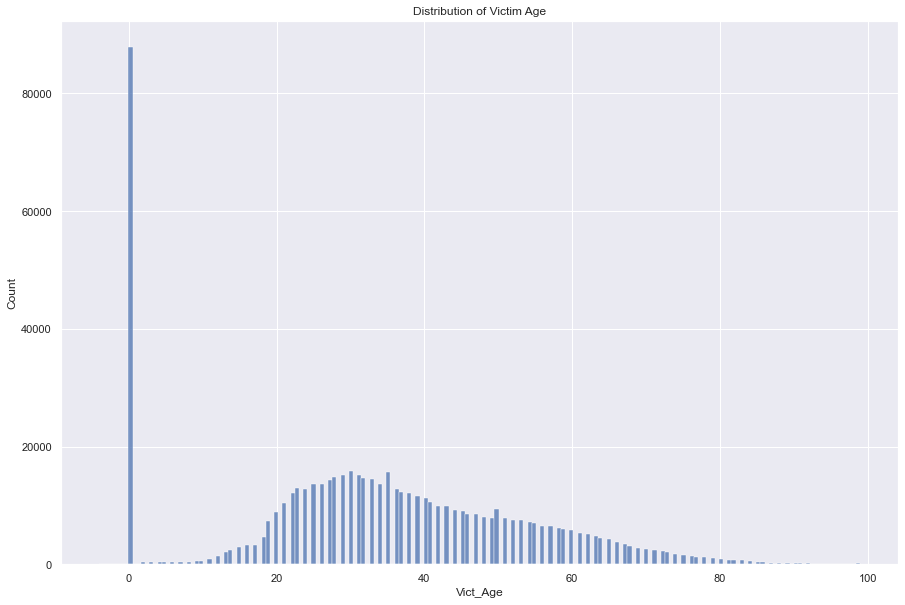

In [13]:
# Ploting a histogram of the victim age distribution
crm_plot = sns.histplot(cln_crime_dt["Vict_Age"])
sns.set(rc = {"figure.figsize" : (15,10)})
crm_plot.set(title = "Distribution of Victim Age")
plt.show()

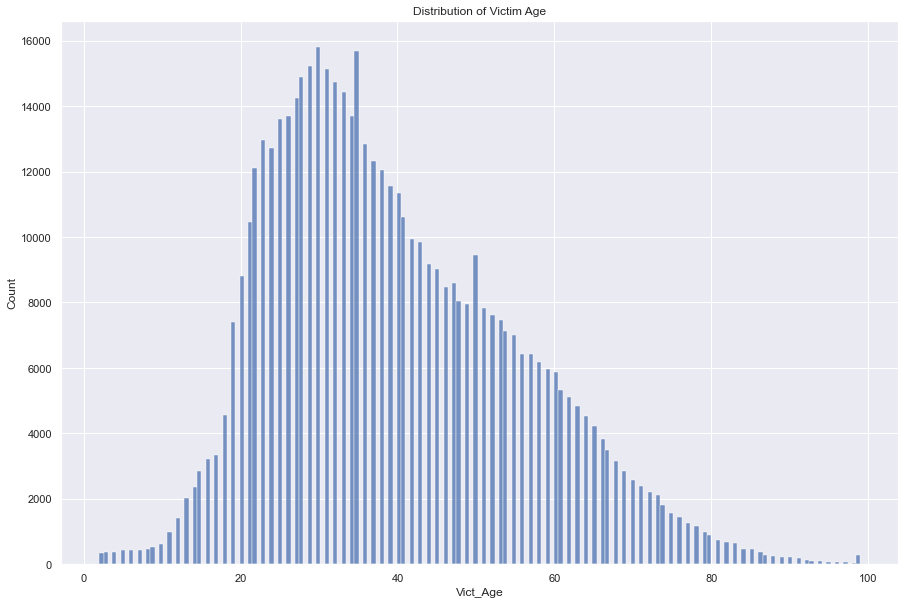

In [15]:
# Dropping records where victim age is less than 1 to eliminate outliers
cln_crime_dt = cln_crime_dt[cln_crime_dt["Vict_Age"] >= 1]

# ploting a histogram for the victim age distribution
crm_plot = sns.histplot(cln_crime_dt["Vict_Age"])
sns.set(rc = {"figure.figsize" : (15,10)})
crm_plot.set(title = "Distribution of Victim Age")
plt.show()

### Creating tables
 *Tables were created from the L.A.P.D Crime Dataset. Careful considerations was given to identify null values and duplicate values in the created datasets* 

In [16]:

def set_indx(tbl, clmn):
    return tbl.set_index(clmn, drop = True, append = False, inplace = True)

def drp_dplct(tbl):
    return tbl.drop_duplicates(inplace = True)

# Creating the incident report table
incd_rpt_tbl = cln_crime_dt[["DIV_REC_NO", "Date_Rptd", "TIMESTAMP", "Rpt_Dist_No", "Part_1-2", "Status_Cd", "Crm_Cd", "Premis_Cd", "AREA_Cd", "LOCATION", "LAT", "LON"]]

# Creating the premises table
premis_tbl = cln_crime_dt[["Premis_Cd", "Premis_Desc"]]
drp_dplct(premis_tbl)

# Creating the victim table
vict_tbl = cln_crime_dt[["DIV_REC_NO", "Vict_Age", "Vict_Sex", "Vict_Descent"]] 

# Dropping rows that are  
incd_rpt_tbl = incd_rpt_tbl[incd_rpt_tbl["Premis_Cd"].isin(premis_tbl["Premis_Cd"])]
vict_tbl = vict_tbl[vict_tbl["DIV_REC_NO"].isin(incd_rpt_tbl["DIV_REC_NO"])]

# Creating the crime table
crm_tbl = cln_crime_dt[["Crm_Cd", "Crm_Cd_Desc"]]
set_indx(crm_tbl, "Crm_Cd")
drp_dplct(crm_tbl)

# Creating the status table
status_tbl = cln_crime_dt[["Status_Cd", "Status_Desc"]]
set_indx(status_tbl, "Status_Cd")
drp_dplct(status_tbl)

# Creating location schema
lctn_tbl = cln_crime_dt[[ "AREA_Cd", "AREA_NAME"]]
set_indx(lctn_tbl, "AREA_Cd")
drp_dplct(lctn_tbl)

# Dropping rows that do not exist in parent table(ie. Primary Key & Foreign Key) 
incd_rpt_tbl = incd_rpt_tbl[incd_rpt_tbl["Premis_Cd"].isin(premis_tbl["Premis_Cd"])]
vict_tbl = vict_tbl[vict_tbl["DIV_REC_NO"].isin(incd_rpt_tbl["DIV_REC_NO"])]

# setting index
set_indx(premis_tbl, "Premis_Cd")
set_indx(vict_tbl, "DIV_REC_NO")
set_indx(incd_rpt_tbl, "DIV_REC_NO")


In [17]:
%%time
# Writing dataframe to CSV 

def wrt_to_csv(dataframe, f_name):
    return dataframe.to_csv(f"C:\\Python_Files\\Crime_data\\CRM_DT_SEG\\{f_name}.csv")

wrt_to_csv(crm_tbl, "crime_tbl")
wrt_to_csv(incd_rpt_tbl, "incidence_reporting_tbl")
wrt_to_csv(premis_tbl, "premise_tbl")
wrt_to_csv(vict_tbl, "victim_tbl")
wrt_to_csv(status_tbl, "status_tbl")
wrt_to_csv(lctn_tbl, "location_tbl")

Wall time: 3.72 s
